### **Import packages**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [48]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**convert numerical and categorical column**

In [49]:
types=visa_df.dtypes
cat_columns=[key for key,value in types.items() if value=='object']
num_columns=[key for key,value in types.items() if value!='object']

In [4]:
num_columns

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

**prevailing_wage**

In [5]:
visa_df.loc[:,'prevailing_wage']
visa_df.iloc[:,[8]]
visa_df['prevailing_wage']
visa_df[['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


- len 
- min
- max
- average(mean)
- standard deviation std
- median
- 25p
- 50p
- 75p

**length**

In [6]:
len(visa_df['prevailing_wage'])

25480

In [7]:
min(visa_df['prevailing_wage'])

2.1367

In [8]:
max(visa_df['prevailing_wage'])

319210.27

In [9]:
#visa_df.iloc[rows,columns]

#start:stop:step
visa_df.iloc[3:7,2:5]
# row 3 4 5 6
# col 2 3 4
visa_df.iloc[3:7,2:5]

,education_of_employee,has_job_experience,requires_job_training
3,Bachelor's,N,N
4,Master's,Y,N
5,Master's,Y,N
6,Bachelor's,N,N


In [10]:
count=len(visa_df['prevailing_wage'])
min_wage=min(visa_df['prevailing_wage'])
max_wage=max(visa_df['prevailing_wage'])
print("The number of wage samples are :",count)
print("the minimum wage is: ",min_wage)
print("The maximum wage is : ",max_wage)

The number of wage samples are : 25480
the minimum wage is:  2.1367
The maximum wage is :  319210.27


**mean**

In [11]:
visa_df[['prevailing_wage']].mean()

prevailing_wage    74455.814592
dtype: float64

In [12]:
visa_df['prevailing_wage'].mean()

74455.81459209183

**Median**

In [13]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [14]:
mean_wage=round(visa_df['prevailing_wage'].mean(),2)
median_wage=round(visa_df['prevailing_wage'].median(),2)
print("The average wage is : ",mean_wage)
print("The median wage is : ",median_wage)

The average wage is :  74455.81
The median wage is :  70308.21


- Mode is not a suitable metric for numerical analysis
- Different observations can have same values

**Using numpy**

In [15]:
np.mean(visa_df['prevailing_wage'])

74455.81459209183

In [16]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

In [26]:
#visa_df['prevailing_wage'].mode()

**Standard deviation**

In [17]:
std_wage=round(visa_df['prevailing_wage'].std(),2)
std_wage

52815.94

In [18]:
count=len(visa_df['prevailing_wage'])
min_wage=min(visa_df['prevailing_wage'])
max_wage=max(visa_df['prevailing_wage'])
mean_wage=round(visa_df['prevailing_wage'].mean(),2)
median_wage=round(visa_df['prevailing_wage'].median(),2)
std_wage=round(visa_df['prevailing_wage'].std(),2)

In [19]:
# step-1:create a empty list ,keep all the values in a list
# step-2: create a index list = ['Count','min','max']
# step-3:create a cols list=['prevailing_wage']
values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage]
index=['count','min','max','mean','median','std']
cols=['prevailing_wage']
wage_df=pd.DataFrame(values,index=index,columns=cols)
wage_df

,prevailing_wage
count,25480.0000
min,2.1367
max,319210.2700
mean,74455.8100
median,70308.2100
std,52815.9400


In [20]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [21]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**25p-50p-75p**

**percentile**

- In numpy we have percentile 
- the method is np.percentile()
- It takes a two arguments
   - a: array means data
   - q: q value which percentile data we want,that value we need to provide
   - if we want 25p value then q=25

**quantile**
- In numpy we have quantile method
- the method is np.quantile()
- It takes a two arguments
   - a: array means data
   - q: q value which percentile data we want,that value we need to provide
   - if we want 25p value then q=0.25
   - if we want 50p value then q=0.50

In [22]:
np.percentile(visa_df['prevailing_wage'],25)
# 0 to 100

34015.479999999996

In [23]:
np.quantile(visa_df['prevailing_wage'],0.25)
# 0 to 1

34015.479999999996

In [24]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)
print("25p value is: ",wage_25p)
print("50p value is: ",wage_50p)
print("75p value is: ",wage_75p)

25p value is:  34015.48
50p value is:  70308.21
75p value is:  107735.51


In [ ]:
count=len(visa_df['prevailing_wage'])
min_wage=min(visa_df['prevailing_wage'])
max_wage=max(visa_df['prevailing_wage'])
mean_wage=round(visa_df['prevailing_wage'].mean(),2)
median_wage=round(visa_df['prevailing_wage'].median(),2)
std_wage=round(visa_df['prevailing_wage'].std(),2)
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)



In [25]:
values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p]
index=['count','min','max','mean','median','std','25p','50p','75p']
cols=['prevailing_wage']
wage_df=pd.DataFrame(values,index=index,columns=cols)
wage_df

,prevailing_wage
count,25480.0000
min,2.1367
max,319210.2700
mean,74455.8100
median,70308.2100
std,52815.9400
25p,34015.4800
50p,70308.2100
75p,107735.5100


In [26]:
#values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p]
#index=['count','min','max','mean','median','std','25p','50p','75p']
for i in num_columns:
    values=[count,min_wage,max_wage,mean_wage,median_wage,std_wage,wage_25p,wage_50p,wage_75p]
    index=['count','min','max','mean','median','std','25p','50p','75p']
    cols=[i]
    wage_df=pd.DataFrame(values,index=index,columns=cols)
    print(wage_df)

        no_of_employees
count        25480.0000
min              2.1367
max         319210.2700
mean         74455.8100
median       70308.2100
std          52815.9400
25p          34015.4800
50p          70308.2100
75p         107735.5100
        yr_of_estab
count    25480.0000
min          2.1367
max     319210.2700
mean     74455.8100
median   70308.2100
std      52815.9400
25p      34015.4800
50p      70308.2100
75p     107735.5100
        prevailing_wage
count        25480.0000
min              2.1367
max         319210.2700
mean         74455.8100
median       70308.2100
std          52815.9400
25p          34015.4800
50p          70308.2100
75p         107735.5100


In [27]:
wage_df.describe()

,prevailing_wage
count,9.000000
mean,83814.618522
std,93744.391378
min,2.136700
25%,34015.480000
50%,70308.210000
75%,74455.810000
max,319210.270000


In [28]:
df1=pd.DataFrame()
for i in num_columns:
    Count=len(visa_df[i])
    Min=min(visa_df[i])
    Max=max(visa_df[i])
    Mean=round(visa_df[i].mean(),2)
    Median=round(visa_df[i].median(),2)
    Std=round(visa_df[i].std(),2)
    P_25=round(np.percentile(visa_df[i],25),2)
    P_50=round(np.percentile(visa_df[i],50),2)
    P_75=round(np.percentile(visa_df[i],75),2)
    values=[Count,Min,Max,Mean,Median,Std,P_25,P_50,P_75]
    index=['count','min','max','mean','median','std','25p','50p','75p']
    cols=[i]
    df2=pd.DataFrame(values,index=index,columns=cols)
    df1=pd.concat([df1,df2],axis=1)

In [29]:
df1

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.0000
min,-26.00,1800.00,2.1367
max,602069.00,2016.00,319210.2700
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
std,22877.93,42.37,52815.9400
25p,1022.00,1976.00,34015.4800
50p,2109.00,1997.00,70308.2100
75p,3504.00,2005.00,107735.5100


**Percentiles**

- 25p :
   - Assume that 25p value=x
   - 25percentage of data less than value : x
- For example prevailing_wage 25p value is : 34015.47
- 25 percentage of people having salary less than 34015.47
- Total members : 25480
- 25percantage of 25480=6370
- which means 6370 people has salary less than 34015.47

In [30]:
np.percentile(visa_df['prevailing_wage'],25)

34015.479999999996

In [31]:
25*25480/100

6370.0

In [32]:
# step-1 : Read the prevailing wage
# step-2 : provide the condition
#         prevailing wage < percentile value
wage_data=visa_df['prevailing_wage']
p_25=np.percentile(visa_df['prevailing_wage'],25)
con=wage_data<p_25
len(visa_df[con])

6370

$case-2$

**50 percentile**

- 50p :
   - Assume that 50p value=x
   - 50percentage of data less than value : x
- For example prevailing_wage 50p value is : 70308
- 50 percentage of people having salary less than 70308
- Total members : 25480
- 50percantage of 25480=12740
- which means 12740 people has salary less than 70308

In [33]:
np.percentile(visa_df['prevailing_wage'],50)

70308.20999999999

In [34]:
wage_data=visa_df['prevailing_wage']
p_50=np.percentile(visa_df['prevailing_wage'],50)
con=wage_data<p_50
len(visa_df[con])

12740

In [35]:
wage_data=visa_df['prevailing_wage']
p_75=np.percentile(visa_df['prevailing_wage'],75)
con=wage_data<p_75
len(visa_df[con])

19110

**Empirical rule**

<img alt="" style="width: 345.7px; height: 172.8px; margin-top: 3.6px; margin-left: 0px;" class="" src="https://tse1.mm.bing.net/th?id=OIP.HofRYcLYY1FENajWovjTnwHaDt&amp;pid=Api&amp;P=0&amp;h=180" id="yui_3_5_1_1_1723007381194_694">

- mean-1*std to mean+1*std : 68%
- mean-2*std to mean+2*std : 95%
- mean-3*std to mean+3*std : 99.7%

In [36]:
# step-1: calculate the mean of prevailing wage
# step-2 : calculate the std of prevailing wage
# step-3 : lb=mean-1*std
# step-4: ub=mean+1*std
# step-5 : con1=data<ub
# step-6 : con2=data>lb
# step-7 : con3=con1 and con2
# step-8 : data[con3]
# step-9 : Compare with 68% 25480 count
mu=visa_df['prevailing_wage'].mean()
sigma=visa_df['prevailing_wage'].std()
lb=mu-sigma
ub=mu+sigma
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))
68*len(visa_df[con3])/100

17171


11676.28

In [37]:
mu=visa_df['prevailing_wage'].mean()
sigma=visa_df['prevailing_wage'].std()
lb=mu-2*sigma
ub=mu+2*sigma
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))
95*len(visa_df[con3])/100

24582


23352.9

**Describe**

In [38]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- By applying Impirical rule we observed slight deviation in the count of data
- Also Mean is slightly deviated from Median
- This gives an indication the data does not follows Normal distribution
- To understand more clearly will visulaize the data
- Its is Numerical data,so The plot name is:**Histogram**
- Histogram is a graph between Class intervals and Class interval frequency
- The plot is available in **matplotlib**
- The method name is **hist**

(array([3863., 2175., 2676., 2828., 2889., 2792., 2485., 2066., 1452.,
         882.,  408.,  216.,  206.,  167.,  129.,  111.,   66.,   48.,
          10.,   11.]),
 array([2.13670000e+00, 1.59625434e+04, 3.19229500e+04, 4.78833567e+04,
        6.38437634e+04, 7.98041700e+04, 9.57645767e+04, 1.11724983e+05,
        1.27685390e+05, 1.43645797e+05, 1.59606203e+05, 1.75566610e+05,
        1.91527017e+05, 2.07487423e+05, 2.23447830e+05, 2.39408237e+05,
        2.55368643e+05, 2.71329050e+05, 2.87289457e+05, 3.03249863e+05,
        3.19210270e+05]),
 <BarContainer object of 20 artists>)

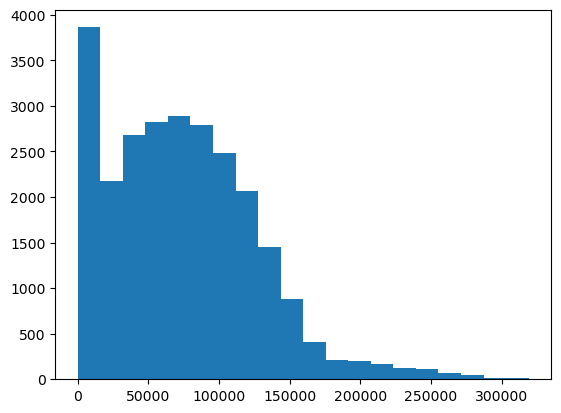

In [39]:
# step-1:Read the prevailing wage
# step-2:plt.hist()
wage_data=visa_df['prevailing_wage']
plt.hist(wage_data,bins=20)

- Histogram will return 3 values
  - Interval count array
    - we have 20 intervals,so we have 20 interval counts
- bins
  - bins means number of intervals
  - we have 20 intervals so we need 21 values
- will display how many intervals are available
- For example in the bins array the first two forms one interval
- 2.136 to 15962.543 the count is 3863
- 3863 observation are available between 2.136 to 15962.543
- similarly 2175 observations are available between (15962.5434,31922.95)

In [51]:
1.59625434e+04

15962.5434

In [52]:
 1.59625434e+04, 3.19229500e+04

(15962.5434, 31922.95)

20
21
<BarContainer object of 20 artists>


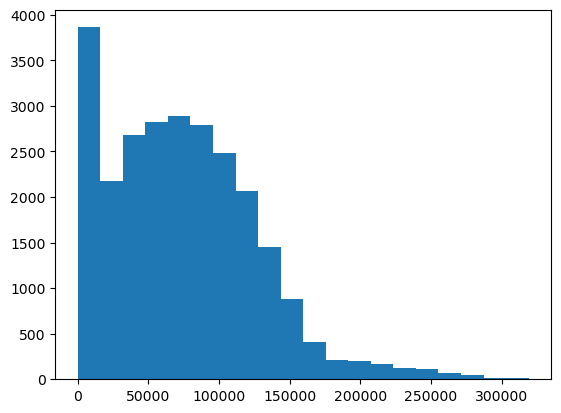

In [40]:
wage_data=visa_df['prevailing_wage']
count,bins,x=plt.hist(wage_data,bins=20)
print(len(count))
print(len(bins))
print(x)

**Verify below two statement**
- 3863 observation are available between 2.136 to 15962.543
- similarly 2175 observations are available between (15962.5434,31922.95)

In [47]:
lb=2.13670000e+00
ub=1.59625434e+04
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))

3862


In [48]:
lb=1.59625434e+04
ub=3.19229500e+04
con1=visa_df['prevailing_wage'] < ub
con2=visa_df['prevailing_wage'] > lb
con3=con1 & con2
print(len(visa_df[con3]))

2175


In [49]:
count

array([3863., 2175., 2676., 2828., 2889., 2792., 2485., 2066., 1452.,
        882.,  408.,  216.,  206.,  167.,  129.,  111.,   66.,   48.,
         10.,   11.])

In [50]:
bins

array([2.13670000e+00, 1.59625434e+04, 3.19229500e+04, 4.78833567e+04,
       6.38437634e+04, 7.98041700e+04, 9.57645767e+04, 1.11724983e+05,
       1.27685390e+05, 1.43645797e+05, 1.59606203e+05, 1.75566610e+05,
       1.91527017e+05, 2.07487423e+05, 2.23447830e+05, 2.39408237e+05,
       2.55368643e+05, 2.71329050e+05, 2.87289457e+05, 3.03249863e+05,
       3.19210270e+05])

In [41]:
list=[]
for i in range(len(bins)):
    if i==20:
        break
    else:
        a=round(bins[i+1],2)
        b=round(bins[i],2)
        list.append(f'{a} to {b}')
list
pd.DataFrame(zip(list,count),columns=['Frequency Intervals','Frequency'])

,Frequency Intervals,Frequency
0,15962.54 to 2.14,3863.0
1,31922.95 to 15962.54,2175.0
2,47883.36 to 31922.95,2676.0
3,63843.76 to 47883.36,2828.0
4,79804.17 to 63843.76,2889.0
5,95764.58 to 79804.17,2792.0
6,111724.98 to 95764.58,2485.0
7,127685.39 to 111724.98,2066.0
8,143645.8 to 127685.39,1452.0
9,159606.2 to 143645.8,882.0


# Draw the Histogram using seaborn try the home

C:\Users\sohel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


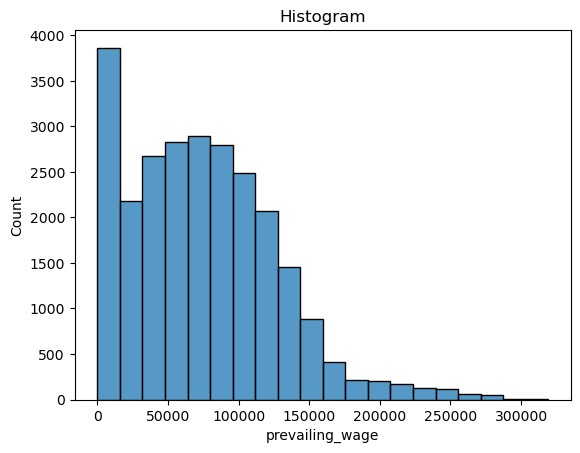

In [51]:
import seaborn as sns
wage_data=visa_df['prevailing_wage']
sns.histplot(wage_data,bins=20)
plt.title('Histogram')
plt.show()

In [43]:
import seaborn as sns
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_core',
 '_decorators',
 '_docstrings',
 '_oldcore',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load